## Task 3
Build a decision tree classifier to predict loan bank approval.

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df=pd.read_excel('loan_prediction.xlsx')

In [356]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


### Basic Checks

In [357]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [359]:
df.shape

(614, 13)

In [360]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [361]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [362]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Looking for missing and duplicated values and handling them

In [363]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [364]:
len(df[df.duplicated()])

0

### Handling the missing values

<AxesSubplot:>

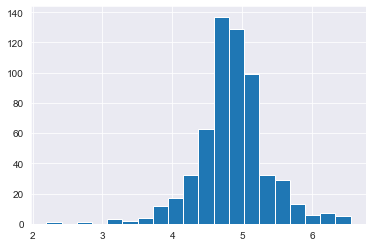

In [365]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

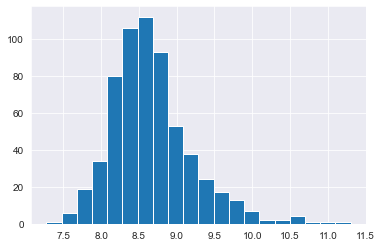

In [366]:
df['TotalIncome']=df['ApplicantIncome'] + df ['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [367]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [368]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [369]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [370]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

### dropping the unwanted columns

In [371]:
df.drop(['Loan_ID'], axis=1, inplace=True)

### Visualizations

In [372]:
print(df['Gender'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

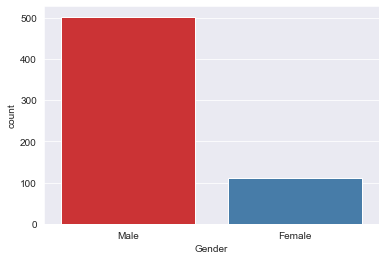

In [373]:
sns.countplot(x='Gender',data=df,palette='Set1')

<AxesSubplot:xlabel='Married', ylabel='count'>

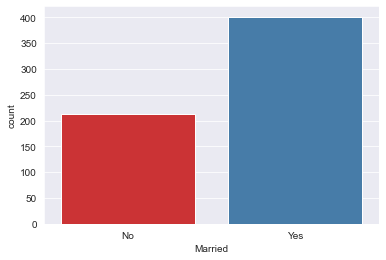

In [374]:
sns.countplot(x='Married',data=df,palette='Set1')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

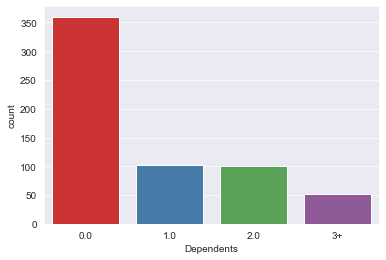

In [375]:
sns.countplot(x='Dependents',data=df,palette='Set1')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

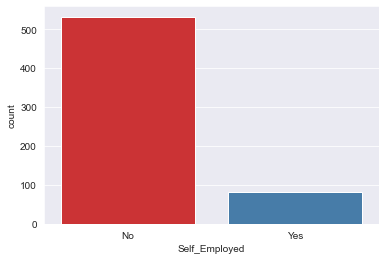

In [376]:
sns.countplot(x='Self_Employed',data=df,palette='Set1')

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

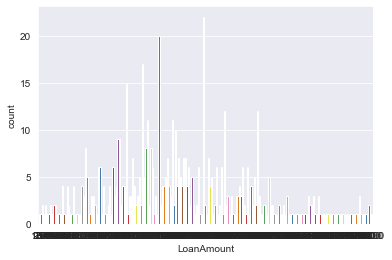

In [377]:
sns.countplot(x='LoanAmount',data=df,palette='Set1')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

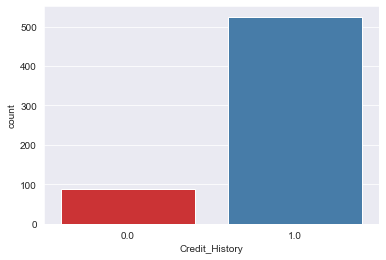

In [378]:
sns.countplot(x='Credit_History',data=df,palette='Set1')

### converting the categorical datatype into numerical

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  LoanAmount_log     614 non-null    float64
 13  TotalIncome        614 non-null    float64
 14  TotalIncome_log    614 non-null    float64
dtypes: float64(8), object(7)
memory usage: 72.1+ KB


In [380]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [381]:
df.replace({'Male':0,'Female':1},inplace=True)

In [382]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [383]:
df.replace({'No':0,'Yes':1},inplace=True)

In [384]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [385]:
df.replace({'N':0,'Y':1},inplace=True)

In [386]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [387]:
df.replace({'Urban':0,'Rural':1,'Semiurban':2},inplace=True)

In [388]:
df['Dependents'].unique()

array([0.0, 1.0, 2.0, '3+'], dtype=object)

In [389]:
df.replace({'0.0':0,'1.0':1,'3+':2},inplace=True)

In [390]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [391]:
df.replace({'Graduate':0,'Not Graduate':1},inplace=True)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  LoanAmount_log     614 non-null    float64
 13  TotalIncome        614 non-null    float64
 14  TotalIncome_log    614 non-null    float64
dtypes: float64(9), int64(6)
memory usage: 72.1 KB


### Standardizing the data

In [393]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log']]=scalar.fit_transform(df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log']])

### Model Building

In [394]:
from sklearn.model_selection import train_test_split

In [395]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [396]:
X=df.drop(columns='Loan_Status',axis=1)

In [397]:
y=df['Loan_Status']

In [398]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,-0.472343,-1.372089,-0.779755,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,-1.250298,1.792161e-15,-0.182184,0.008468
1,-0.472343,0.728816,0.399480,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-0.060092,-1.092417e-02,-0.144684,0.082903
2,-0.472343,0.728816,-0.779755,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,-1.250298,-1.347462e+00,-0.623656,-1.217363
3,-0.472343,0.728816,-0.779755,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,-1.250298,-1.411496e-01,-0.322885,-0.301273
4,-0.472343,-1.372089,-0.779755,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,-1.250298,1.842563e-01,-0.158785,0.055266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,-1.372089,-0.779755,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-0.060092,-1.200112e+00,-0.639152,-1.279607
610,-0.472343,0.728816,1.578715,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,-0.060092,-2.357923e+00,-0.452274,-0.641153
611,-0.472343,0.728816,0.399480,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.273231,0.411733,-1.250298,1.363919e+00,0.199475,0.653699
612,-0.472343,0.728816,1.578715,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.273231,0.411733,-1.250298,7.539780e-01,0.086512,0.485168


In [399]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [401]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 14), (123, 14), (491,), (123,))

In [402]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [403]:
clf = DecisionTreeClassifier()

In [404]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [405]:
y_pred = clf.predict(X_test)

In [406]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [407]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6910569105691057


#### performing hyperparameter tuning to increase the accuracy

In [408]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.806411049268192
